In [74]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
import matplotlib.pyplot as plt
from PIL import Image
import math

In [75]:
def get_image_label(data, dir, indices):
    # just looking at 2 examples for testing purposes
    X = np.array([np.asarray(Image.open(f'{dir}{data.iloc[i].id_code}.png')) for i in indices[:2]])
    y = np.array([int(data.iloc[i].diagnosis) for i in indices[:2]])

    return X,y

def get_dataset(path, dir):

    data = pd.read_csv(path)
    arr = [i for i in range(len(data))]
    random.shuffle(arr)
    train_indices = arr[:2]
    train_X, train_y = get_image_label(data, dir, train_indices)
    train_X = train_X / 255.0

    return train_X, train_y


test_X, test_y = get_dataset("/u/home/r/rosemary/scratch/train.csv",
                                                 '/u/home/r/rosemary/scratch/train_images_smol/')
X1 = test_X[0]
X2 = test_X[1]
y1 = test_y[0]
y2 = test_y[1]

In [80]:
'''IMPLEMENTATION FUNCTION OF CUTMIX, ONLY COPY THIS CELL IS ENOUGH!'''
import copy

### take in 2 images with labels, return augmented image with cut-mix with its updated label
def cutmix(X1,X2,y1,y2):
    a = 1
    W = 160
    H = 160

    lamb = np.random.beta(a, a)
    r_x = math.floor(np.random.uniform(0,W))
    r_y = math.floor(np.random.uniform(0,H))

    r_w = math.floor(math.sqrt(1-lamb) * W)
    r_h = math.floor(math.sqrt(1-lamb) * H)
    if r_x + r_w > W:
        r_w = W - r_x
    if r_y + r_h > H:
        r_h = H - r_y

    ### change on all 3 filters right?
    X = np.zeros((160,160,3))
    y = 0

    X = copy.deepcopy(X1)
    mask = X2[r_x:r_x+r_w,r_y:r_y+r_h,:]
    X[r_x:r_x+r_w,r_y:r_y+r_h,:] = mask

    y = lamb*y1 + (1-lamb)*y2
    
    return X,y

1


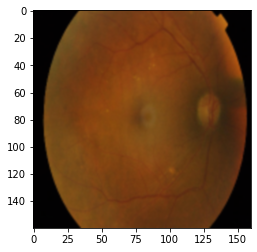

In [81]:
from torchvision import transforms

plt.imshow(transforms.ToPILImage()(transforms.ToTensor()(X1)), interpolation="bicubic")
print(y1)

0


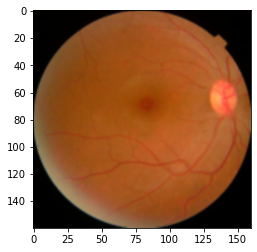

In [82]:
plt.imshow(transforms.ToPILImage()(transforms.ToTensor()(X2)), interpolation="bicubic")
print(y2)

0.6310977712544333


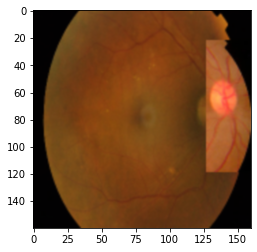

In [83]:
X, y = cutmix(X1,X2,y1,y2)
plt.imshow(transforms.ToPILImage()(transforms.ToTensor()(X)), interpolation="bicubic")
print(y)